In [1]:
import ROOT

  
# S e t u p   m o d e l 
# ---------------------

# Declare variables x,mean,sigma with associated name, title, initial value and allowed range
x = ROOT.RooRealVar("x","x",-10,10)
mean = ROOT.RooRealVar("mean","mean of gaussian",1,-10,10)
sigma = ROOT.RooRealVar("sigma","width of gaussian",1,0.1,10)

# Build gaussian p.d.f in terms of x,mean and sigma
gauss = ROOT.RooGaussian("gauss","gaussian PDF",x,mean,sigma)

# Construct plot frame in 'x'
xframe = x.frame(ROOT.RooFit.Title("Gaussian p.d.f.")) #RooPlot

Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [2]:
# P l o t   m o d e l   a n d   c h a n g e   p a r a m e t e r   v a l u e s
# ---------------------------------------------------------------------------

# Plot gauss in frame (i.e. in x) 
gauss.plotOn(xframe)

# Change the value of sigma to 3
sigma.setVal(3)

# Plot gauss in frame (i.e. in x) and draw frame on canvas
gauss.plotOn(xframe,ROOT.RooFit.LineColor(ROOT.kRed))

<ROOT.RooPlot object ("frame_x_7fd34c75c6d0") at 0x7fd34c75c6d0>

In [3]:
# G e n e r a t e   e v e n t s 
# -----------------------------

# Generate a dataset of 1000 events in x from gauss
data = gauss.generate(ROOT.RooArgSet(x),10000)  # RooDataSet

# Make a second plot frame in x and draw both the 
# data and the p.d.f in the frame
xframe2 = x.frame(ROOT.RooFit.Title("Gaussian p.d.f. with data")) #RooPlot
data.plotOn(xframe2)
gauss.plotOn(xframe2)

<ROOT.RooPlot object ("frame_x_7fd34c7b88a0") at 0x7fd34c7b88a0>

In [4]:
# F i t   m o d e l   t o   d a t a
# -----------------------------

# Fit pdf to data
gauss.fitTo(data,ROOT.RooFit.PrintLevel(-1))

In [5]:
# Print values of mean and sigma (that now reflect fitted values and errors)
mean.Print()
sigma.Print()

RooRealVar::mean = 1.01746 +/- 0.0300144  L(-10 - 10) 
RooRealVar::sigma = 2.9787 +/- 0.0219217  L(0.1 - 10) 


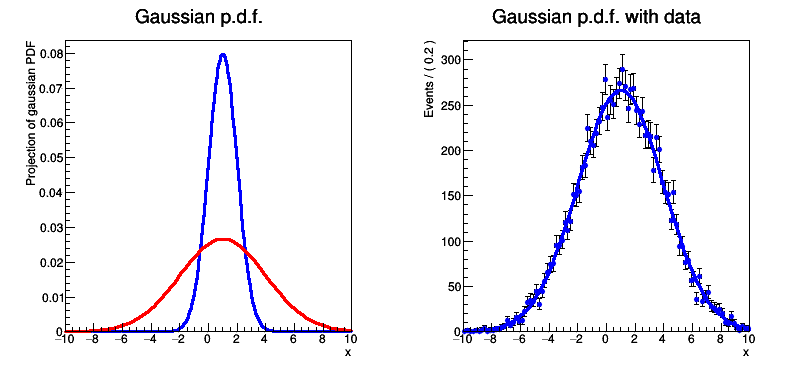

In [6]:
# Draw all frames on a canvas
c = ROOT.TCanvas("rf101_basics","rf101_basics",800,400)
c.Divide(2)
c.cd(1) ; ROOT.gPad.SetLeftMargin(0.15) ; xframe.GetYaxis().SetTitleOffset(1.6) ; xframe.Draw() ;
c.cd(2) ; ROOT.gPad.SetLeftMargin(0.15) ; xframe2.GetYaxis().SetTitleOffset(1.6) ; xframe2.Draw() ;
c.Draw()